# Career Foundry 6.6 

In [4]:
# Install quandl
!pip install quandl

In [2]:
conda install -c anaconda quandl


Retrieving notices: ...working... done
Channels:
 - anaconda
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - quandl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.8.30          |  py312hca03da5_0         166 KB  anaconda
    conda-24.7.1               |  py312hca03da5_0         1.2 MB  anaconda
    quandl-3.7.0               |     pyhd8ed1ab_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  quandl             conda-forge/noarch::quandl-3.7.0-pyhd8ed1ab_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2024.8.30~ --> anaconda/

In [1]:
#importing libaries 
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [6]:
# importing data
file_path = '/Users/katiejogoyal/Desktop/Career Foundry 6/sales data-set.csv'
df = pd.read_csv(file_path)


In [7]:
# Check data 
df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1      5/2/10      24924.50      False
1      1     1     12/2/10      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1      5/3/10      21827.90      False

In [25]:
# Create a subset of date and weekly_sales
df_sub = df[['Date', 'Weekly_Sales']]

In [26]:
# Group by date with the mean of the avg delay
df_sub = df_sub.groupby('Date')['Weekly_Sales'].mean()

In [27]:
# Date and Weekly Sales 
df_sub.head()

Date
1/10/10     14391.780535
1/4/11      14726.869261
1/6/12      16405.589439
1/7/11      16232.862334
10/12/10    18882.893619
Name: Weekly_Sales, dtype: float64

In [28]:
# Turn df_sub into data frame
df_sub = df_sub.reset_index()
df_sub

Date  Weekly_Sales
0     1/10/10  14391.780535
1      1/4/11  14726.869261
2      1/6/12  16405.589439
3      1/7/11  16232.862334
4    10/12/10  18882.893619
..        ...           ...
138   9/12/11  18458.853056
139    9/3/12  15965.182956
140    9/4/10  16050.589780
141    9/7/10  16500.010117
142    9/9/11  15809.069483

[143 rows x 2 columns]

In [31]:
# Convert 'Date' column to datetime, allowing pandas to infer the format
df_sub['datetime'] = pd.to_datetime(df_sub['Date'], infer_datetime_format=True, errors='coerce')

# Set 'datetime' column as the index
df_sub = df_sub.set_index('datetime')

# Drop the original 'Date' column
df_sub.drop(['Date'], axis=1, inplace=True)

# Display the first few rows of the modified DataFrame
df_sub.head()


Weekly_Sales
datetime                
2010-01-10  14391.780535
2011-01-04  14726.869261
2012-01-06  16405.589439
2011-01-07  16232.862334
2010-10-12  18882.893619

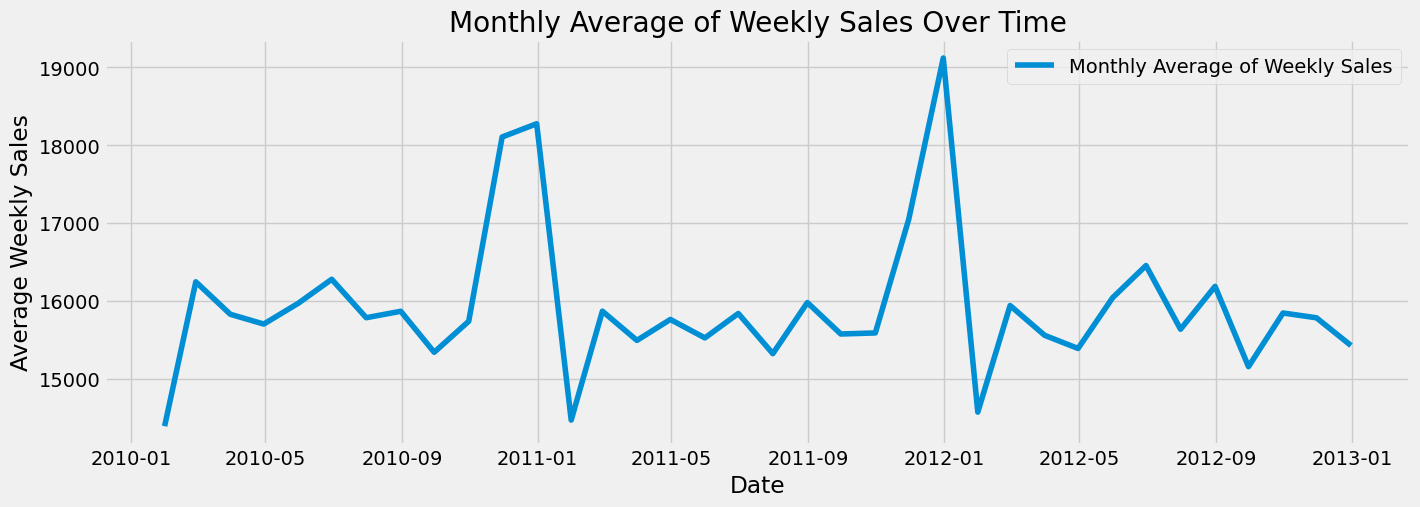

In [41]:
# Resample the data to monthly frequency and take the mean of weekly sales
df_sub_resampled = df_sub['Weekly_Sales'].resample('M').mean()

# Plot the resampled data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub_resampled.index, df_sub_resampled, label='Monthly Average of Weekly Sales')

# Set title and labels
plt.title('Monthly Average of Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [42]:
# Check for missing values
df_sub.isnull().sum() 

Weekly_Sales             0
Weekly_Sales_Smoothed    3
dtype: int64

In [44]:
# Check for duplicates
dups = df_sub.duplicated()
dups.sum()
# No dups

0

# Observation 
The chart shows generally stable weekly sales, with a significant spike in late 2011 likely tied to seasonal events or promotions, followed by a sharp decline in early 2012, suggesting a post-holiday slowdown. Overall, sales fluctuate moderately throughout 2010-2012, with some cyclic patterns hinting at seasonal or event-driven variations.

In [50]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

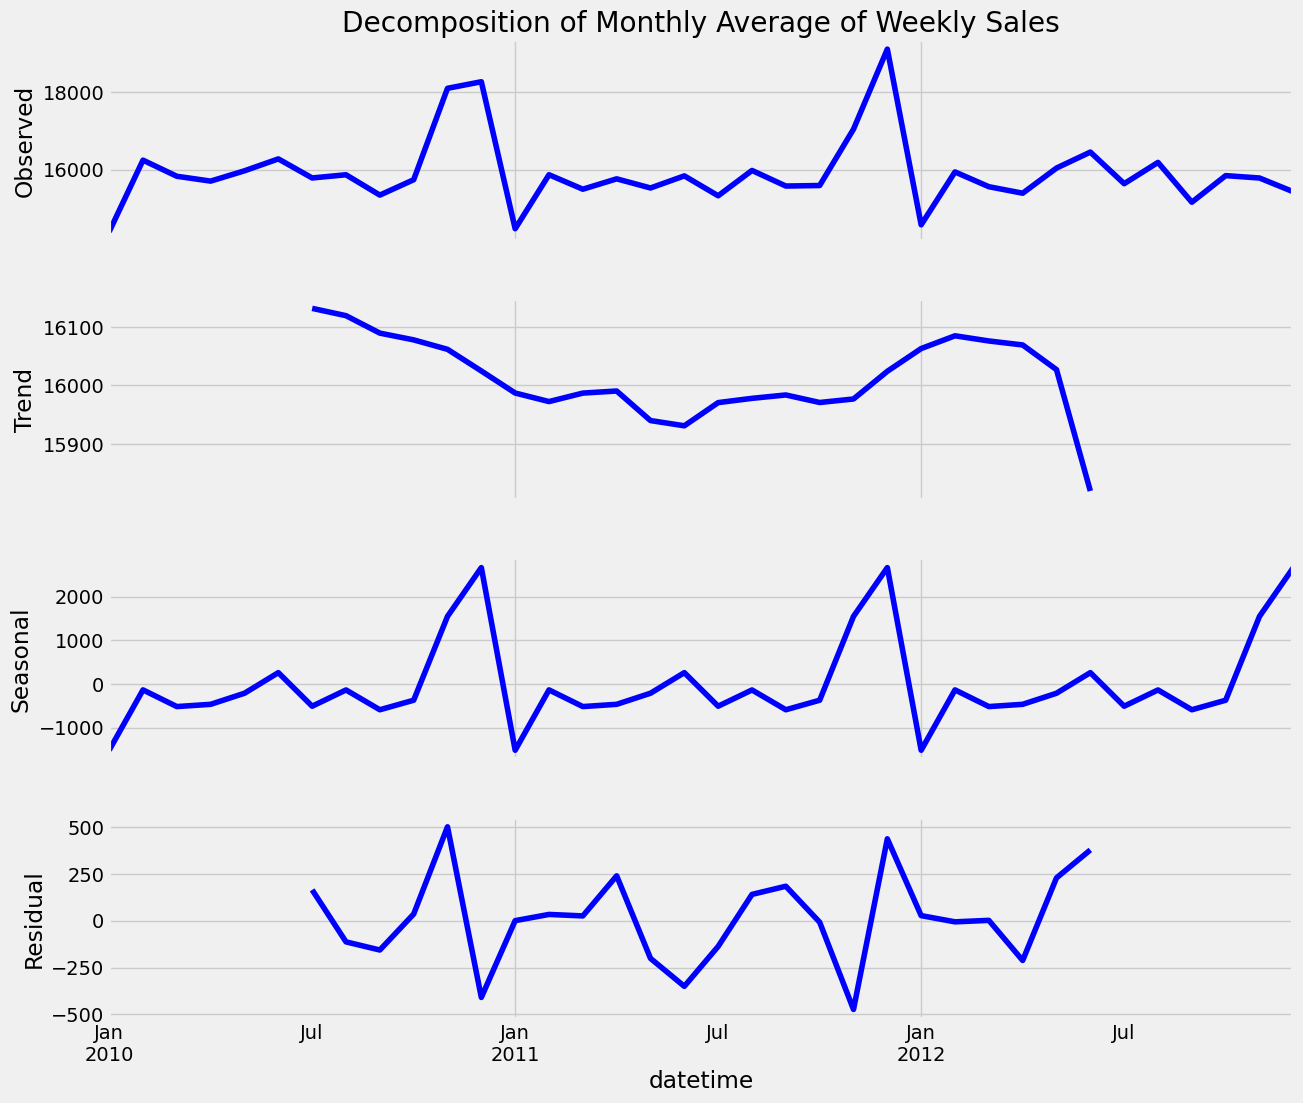

In [56]:
# Decoposition plot
df_monthly_avg = df_sub['Weekly_Sales'].resample('M').mean() 
decomposition = sm.tsa.seasonal_decompose(df_monthly_avg, model='additive', period=12)  
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)  

# Plot each component in a different subplot
decomposition.observed.plot(ax=axes[0], legend=False, color='blue')
axes[0].set_ylabel('Observed')
axes[0].set_title('Decomposition of Monthly Average of Weekly Sales')

decomposition.trend.plot(ax=axes[1], legend=False, color='blue')
axes[1].set_ylabel('Trend')

decomposition.seasonal.plot(ax=axes[2], legend=False, color='blue')
axes[2].set_ylabel('Seasonal')

decomposition.resid.plot(ax=axes[3], legend=False, color='blue')
axes[3].set_ylabel('Residual')

# Improve spacing between subplots
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()


# Observations
The decomposition shows a declining trend in sales from 2010 to mid-2011, with some recovery through mid-2012, while seasonality remains a consistent factor, with regular increases during specific months likely tied to holidays or promotions. The residuals show most fluctuations are explained by the trend and seasonality, though some unexplained spikes suggest external factors or anomalies affecting sales at certain points.

In [57]:
# Importing libaries 
from statsmodels.tsa.stattools import adfuller  # Import the adfuller() function
import pandas as pd

In [58]:
# Test for Stationarity 
def dickey_fuller(timeseries):  
    # Perform the Dickey-Fuller test:
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print(result)

# Apply the test using the function on the 'Weekly_Sales' time series
dickey_fuller(df_sub['Weekly_Sales'])


Dickey-Fuller Stationarity test:
Test Statistic                  -3.052212
p-value                          0.030298
Number of Lags Used              4.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64


# Interpretation
The Dickey-Fuller test indicates that the weekly sales time series is stationary at the 5% significance level, as the test statistic is lower than the 5% critical value and the p-value is below 0.05. This means the series is stable over time, and further transformations like differencing are not needed for stationarity in time series modeling.








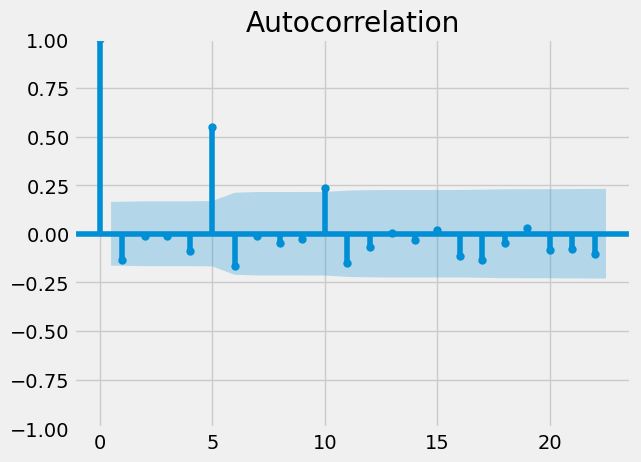

In [61]:
# Plot autocorrelation for the 'Weekly_Sales' column
plot_acf(df_sub['Weekly_Sales'])
plt.show()

# Interpretation
The autocorrelation plot shows that weekly sales are highly correlated with the previous week's sales (lag 1), with diminishing significance at higher lags, suggesting the series is stationary and can be effectively modeled using a simple autoregressive model.